### Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

### Load dataset

In [5]:
path_to_dataset_red_wine = r"C:\Users\kamil\Documents\PredictModel\data-science-salaries-project\data\raw\wine+quality\winequality-red.csv"
path_to_dataset_white_wine = r"C:\Users\kamil\Documents\PredictModel\data-science-salaries-project\data\raw\wine+quality\winequality-white.csv"


red_wine_df= pd.read_csv(path_to_dataset_red_wine, sep=';')
white_wine_df= pd.read_csv(path_to_dataset_white_wine, sep=';')

red_wine_df['colour'] = 'red'
white_wine_df['colour'] = 'white'

dataset_df= pd.concat([red_wine_df, white_wine_df])

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  


In [6]:
print(dataset_df.shape)

(6497, 13)


### Dispaly data and info about it 
* first and last rows in the dataframe

In [7]:
print('First 5 rows of the dataset:')
display(dataset_df.head())

print('Last 5 rows of the dataset:')
display(dataset_df.tail())

First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Last 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


* data information

In [8]:
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  colour                6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


#### Numerical data information

In [9]:
dataset_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* Histogram

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')


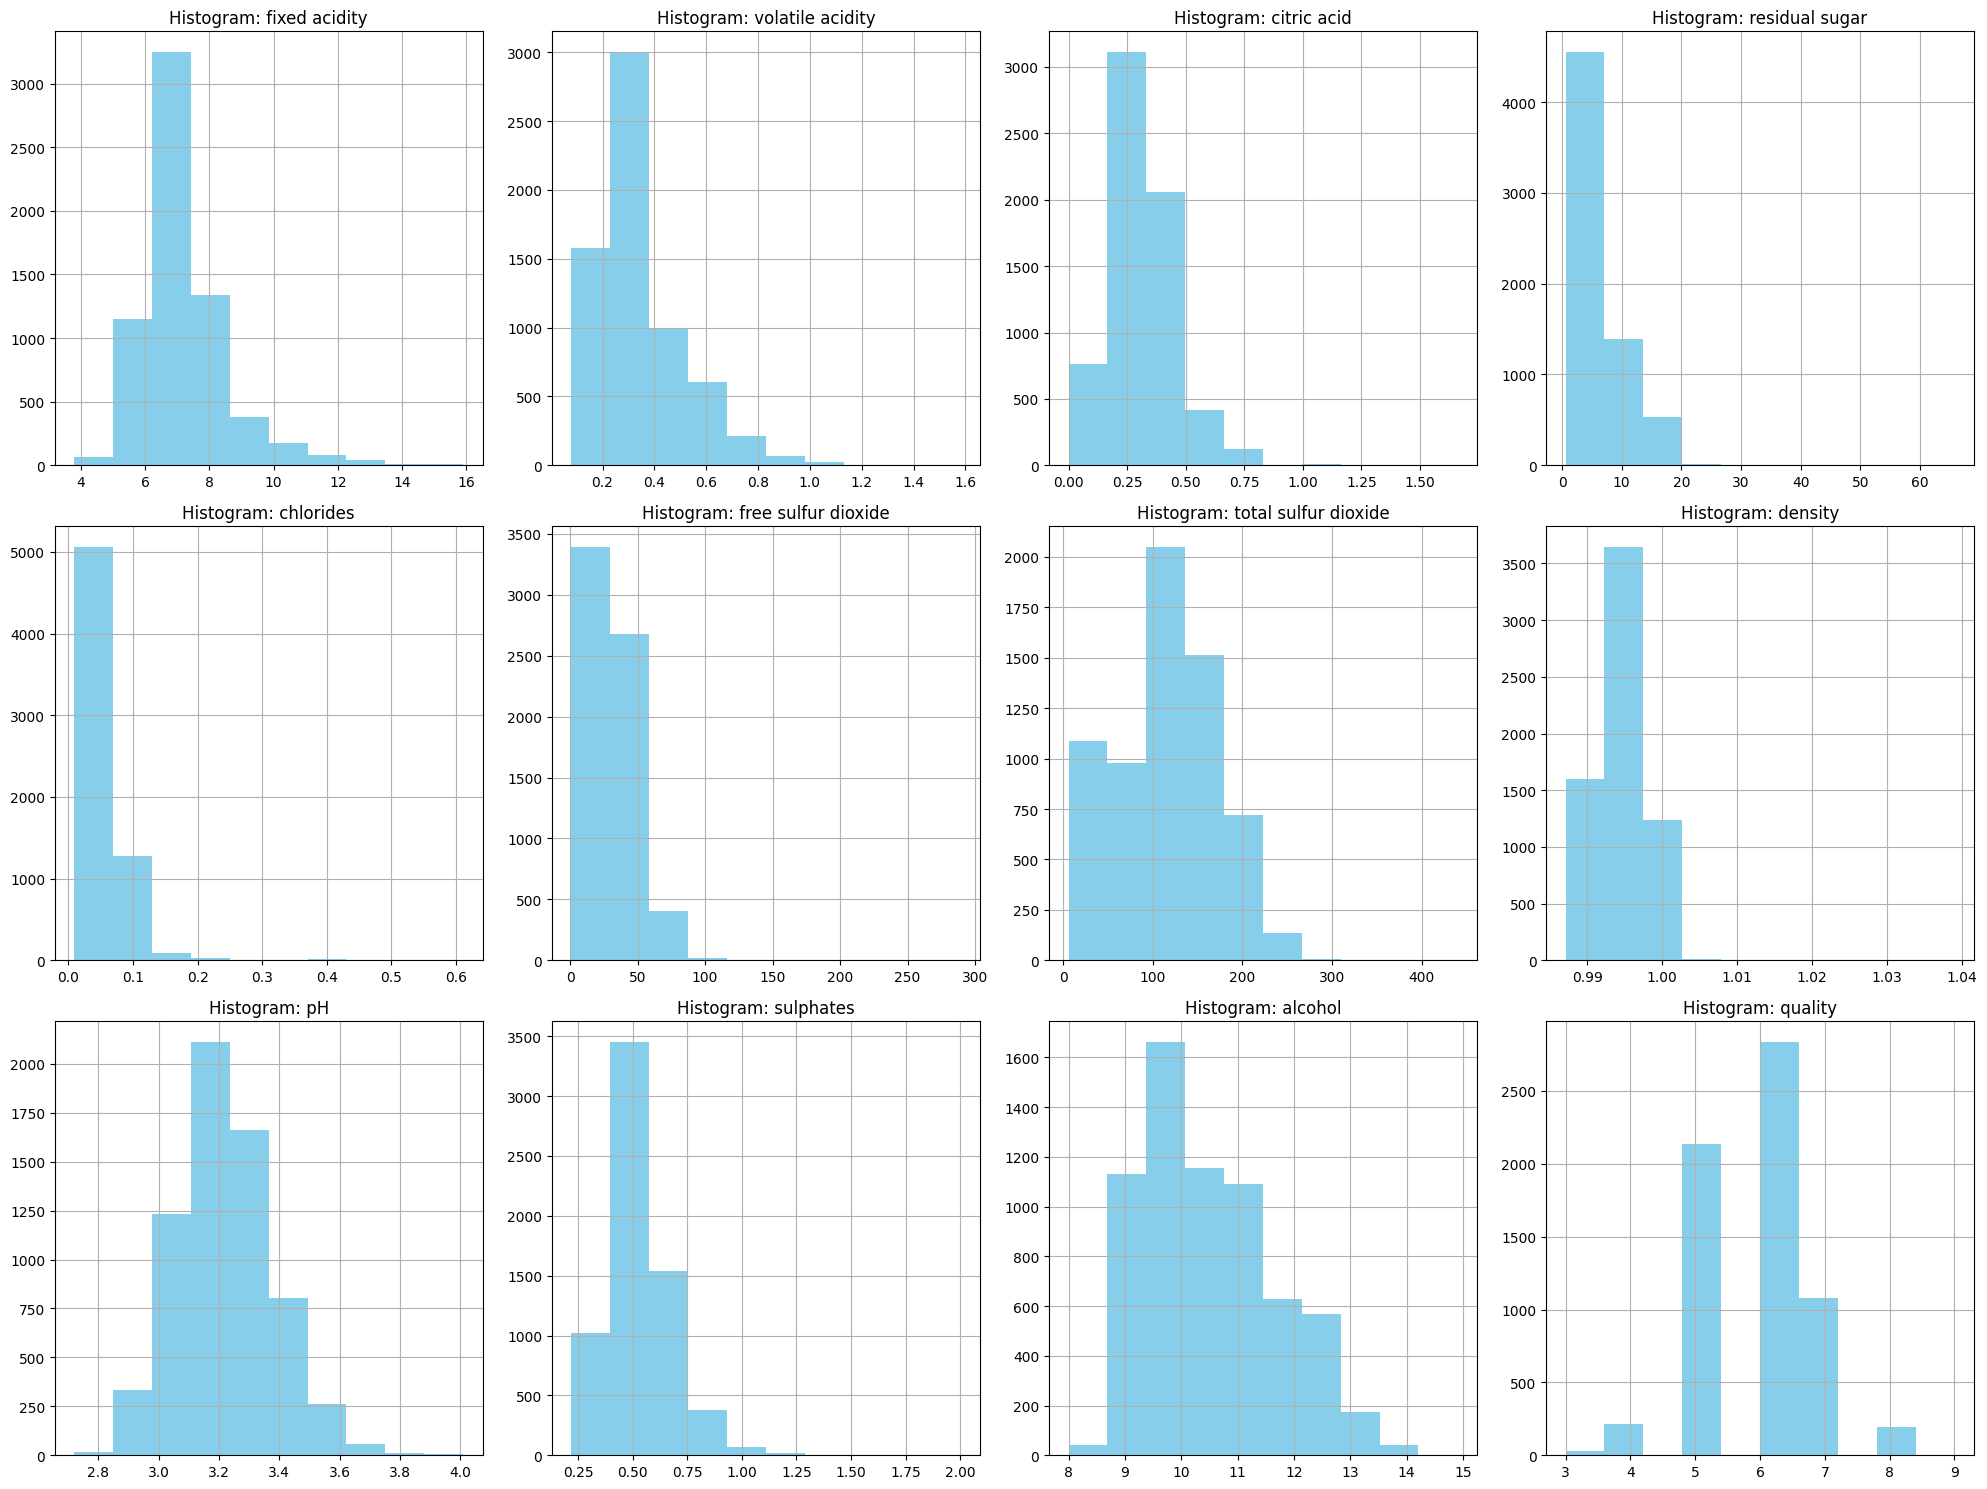

In [15]:
numercial_columns = dataset_df.select_dtypes(include=['int64', 'float64']).columns
len_of_numerical_columns = len(numercial_columns)
fig, axes = plt.subplots(ceil(len_of_numerical_columns/4), 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration
print(numercial_columns)
for i in range(len_of_numerical_columns):
    # Histogram
    dataset_df[numercial_columns[i]].hist(ax=axes[i], color='skyblue')
    axes[i].set_title(f"Histogram: {numercial_columns[i]}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Categorical data information

* number of unique values

In [19]:
categorical_columns = dataset_df.select_dtypes(include=['object']).columns
display(dataset_df[categorical_columns].nunique())

colour    2
dtype: int64

* frequency of category in percent

In [20]:
for col in categorical_columns:
    print(f'{col}: {dataset_df[col].value_counts(normalize=True)*100}')

colour: colour
white    75.388641
red      24.611359
Name: proportion, dtype: float64


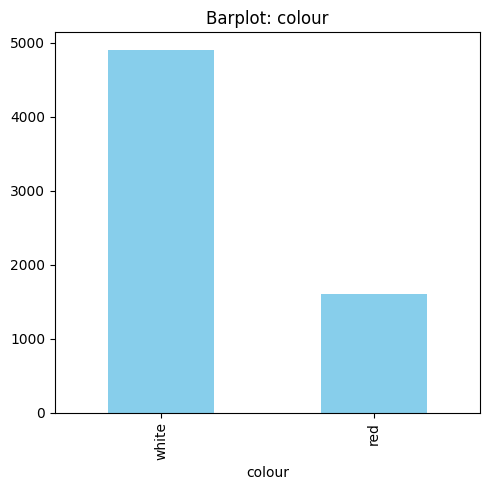

In [24]:
categorical_columns_to_plot = categorical_columns.copy()
fig, ax = plt.subplots(figsize=(5, 5))

dataset_df[categorical_columns_to_plot[0]].value_counts().plot(kind='bar', ax=ax, color='skyblue')
ax.set_title(f"Barplot: {categorical_columns_to_plot[0]}")

plt.tight_layout()
plt.show()

#### Corelation
 ##### 2. Correlations between Numerical Columns



Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   alcohol   quality
fixed acidity              1.000000          0.219008     0.324436       -0.111981   0.298195            -0.282735             -0.329054  0.458910 -0.252700   0.299568 -0.095452 -0.076743
volatile acidity           0.219008          1.000000    -0.377981       -0.196011   0.377124            -0.352557             -0.414476  0.271296  0.261454   0.225984 -0.037640 -0.265699
citric acid                0.324436         -0.377981     1.000000        0.142451   0.038998             0.133126              0.195242  0.096154 -0.329808   0.056197 -0.010493  0.085532
residual sugar            -0.111981         -0.196011     0.142451        1.000000  -0.128940             0.402871              0.495482  0.552517 -0.267320  -0.185927 -0.359415 -0.036980
chlorides                  0.298195   

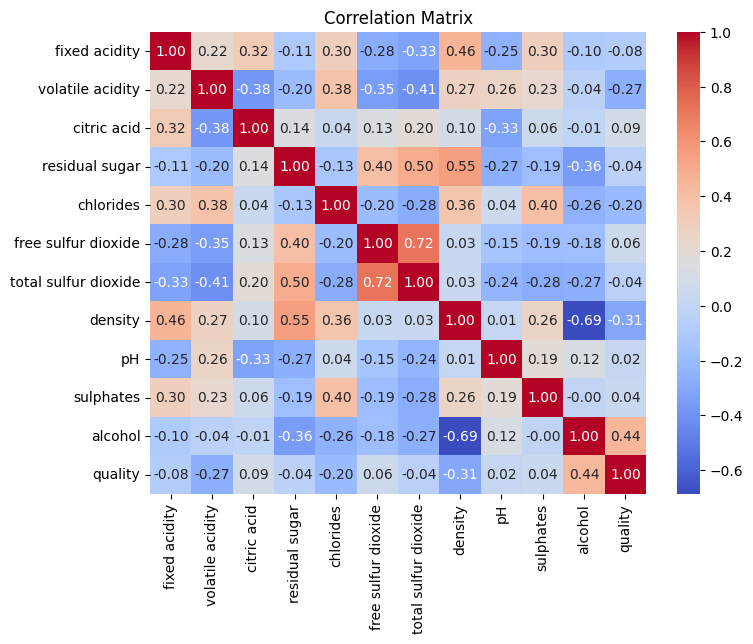

In [25]:
numerical_columns = dataset_df.select_dtypes(include=['int64', 'float64']).columns
# Correlation matrix
correlation_matrix = dataset_df[numerical_columns].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()